In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 27kB/s 
     |████████████████████████████████| 3.9MB 47.2MB/s 
     |████████████████████████████████| 450kB 44.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f8185d9b99d2a65e8f649d553cc90d616b118b97fa7c31b436fc78f4ca954ffe
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc4 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc4 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Unins

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.1.0


In [3]:
from tensorflow.keras.datasets import mnist
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


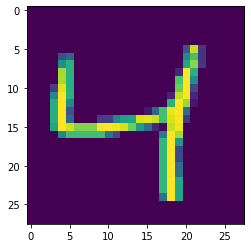

In [4]:
plt.imshow(X_train[2])

In [5]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_train.max()

255

In [0]:
X_train = X_train /255.0
X_test = X_test /255.0  

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [9]:
X_train[0].shape

(28, 28, 1)

In [0]:
input_shape = X_train[0].shape

In [17]:
# Use Relu of input and Hidden layer activations
# Performs better than tanh and other related activation functions
model = Sequential()
model.add(Conv2D(filters = 32 , kernel_size = (3,3) , activation = "relu" , input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))

# Use softmax for output layer 
model.add(Dense(10,activation="softmax")) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:

history = model.fit(X_train,y_train,batch_size = 120, epochs = 10 , verbose = 1,
	 validation_data = (X_test,y_test))
## 99.16 % accuracy

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 145s 2ms/sample - loss: 0.2330 - accuracy: 0.9284 - val_loss: 0.0518 - val_accuracy: 0.9837
Epoch 2/10
60000/60000 [==============================] - 143s 2ms/sample - loss: 0.0848 - accuracy: 0.9746 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 3/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0337 - val_accuracy: 0.9887
Epoch 4/10
60000/60000 [==============================] - 146s 2ms/sample - loss: 0.0511 - accuracy: 0.9843 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 5/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0285 - val_accuracy: 0.9912
Epoch 6/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 7/10
60000/60000 [==========================

In [20]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 7s 722us/sample - loss: 0.0249 - accuracy: 0.9919


[0.024917067999036955, 0.9919]

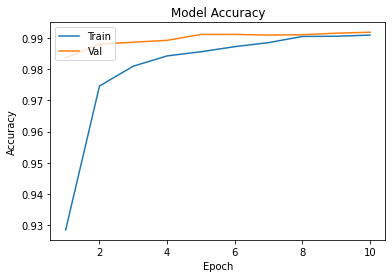

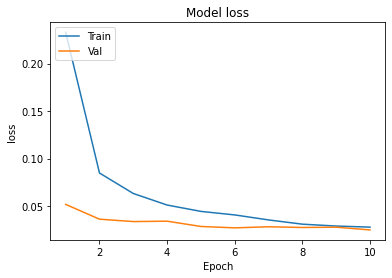

In [21]:
def plot_learningCurve(history,epochs):
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()
  # Plot the training and validation accuracy valeus
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.xlabel("Epoch")
  plt.ylabel("loss")
  plt.legend(["Train","Val"],loc = "upper left")
  plt.show()


plot_learningCurve(history,epochs=10)  